# Analysis of trading algorithm
DISCLAIMER: This analysis is done on a quite simple trading algorithm as our value investment algorithm is not yet finished. As a comparison benchmark for the algorithm we used the S&P500, which includes the shares of the 500 largest companies.

This notebook includes the analysis of the first part of our hypothesis. 

Our hypothesis:
A distributed autonomous hedge fund implemented in a blockchain based on smart contracts is (1) able to be more profitable than benchmark indexes and (2) investments follow sustainability criteria that are transparent to the investors.

## Load data into notebook
We are using [zipline](https://github.com/quantopian/zipline) to simulate our trading algorithms. Zipline offers to output the results of the simulation as a pandas pickle file. The advantage of using zipline is that it already calculates common indicators including Sharpe, alpha, beta and the return.

We simulated our simple algorithm for a random period of two months. The period covered is from beginning of October 2013 to end of November 2013.


In [1]:
import pandas as pd
performance = pd.read_pickle('results/test1.pickle')
# display the top 5 rows to see if the load worked
performance.head()

/home/nud3l/GitHub/pyfolio/pyfolio/lib/python3.4/site-packages/pandas/tseries/index.py:755: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning)
/home/nud3l/GitHub/pyfolio/pyfolio/lib/python3.4/site-packages/pandas/tseries/index.py:755: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning)
/home/nud3l/GitHub/pyfolio/pyfolio/lib/python3.4/site-packages/pandas/tseries/index.py:755: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning)


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2010-01-04 21:00:00,NaN,0.000000,NaN,0.016043,NaN,NaN,0.000000,10000000.000000,0.00,0.00,...,0,0,0,NaN,10000000.000000,0.00,0.00,1,[],0.0385
2010-01-05 21:00:00,0.003036,-0.000270,-0.084589,0.019209,0.145114,0.020923,-8637870.019948,1362129.980052,8635165.20,8635165.20,...,0,0,0,-11.224972,10000000.000000,0.00,0.00,2,"[{'commission': None, 'sid': Equity(2668 [PGR]...",0.0377
2010-01-06 21:00:00,0.007230,0.000347,0.062639,0.019765,0.131850,-0.020208,-665994.089610,696135.890442,9307337.54,9307337.54,...,0,0,0,11.775215,1362129.980052,8635165.20,8635165.20,3,"[{'commission': None, 'sid': Equity(1800 [RLI]...",0.0385
2010-01-07 21:00:00,0.080820,0.010622,0.902420,0.023845,0.109566,-0.156314,-243145.683791,452990.206651,9653229.54,9653229.54,...,0,0,0,311.600483,696135.890442,9307337.54,9307337.54,4,"[{'commission': None, 'sid': Equity(138 [AFSI]...",0.0385
2010-01-08 21:00:00,0.077186,0.008673,0.537579,0.026796,0.097318,-0.074338,-105178.446183,347811.760468,9738915.28,9738915.28,...,0,0,0,31.674684,452990.206651,9653229.54,9653229.54,5,"[{'commission': None, 'sid': Equity(2198 [UVE]...",0.0383


In [2]:
# display the rows that we have in the dataset
for row in performance.columns.values:
    print(row)

algo_volatility
algorithm_period_return
alpha
benchmark_period_return
benchmark_volatility
beta
capital_used
ending_cash
ending_exposure
ending_value
excess_return
gross_leverage
information
long_exposure
long_value
longs_count
max_drawdown
max_leverage
net_leverage
num_positions
orders
period_close
period_label
period_open
pnl
portfolio_value
positions
returns
sharpe
short_exposure
short_value
shorts_count
sortino
starting_cash
starting_exposure
starting_value
trading_days
transactions
treasury_period_return


## Variables
Based on our algorithm assets are traded on the stock market. The algorithm works as follows: A simple algorithm that longs the top 3 stocks by Relative Strength Index (RSI) and shorts the bottom 3 each day. The idea of RSI is to give an indicator of overbought (i.e. overvalued) and oversold (i.e. undervalued) assets. Thus, we have the independent variable RSI, which influences the derivatives we are trading. Furthermore, the derivatives are evaluated based on other trades, which we will not consider in this analysis. The trading strategy itself is in itself a quite complex variable, as it will influence any performance measurement.

The following dependent variables will be analysed:

1. Return of the fund as daily intervals: 
   Determine overall profit/loss, mean profit/loss per time interval (week/month) and outliers of profit and loss
   
2. Sharpe ratio of the fund as daily intervals: 
   Determine overall Sharpe ratio (performance as compared to its risk), mean Sharpe ratio per time interval (week/month) and outliers
   
3. Beta of the fund as daily intervals: 
   Measure historical volatility in comparison to S&P500 index 
   
4. Alpha of the fund as daily intervals: 
   Measure historical return on investment compared to its Sharpe ratio (risk adjusted expected return)

### Return of the fund
The return of the fund is influenced by how well the strategy is able to determine assets that are increasing (for long) or decreasing (for short) in value over time.

In the figure below we are printing the algorithm relative return compared to our S&P500 benchmark.

Populating the interactive namespace from numpy and matplotlib


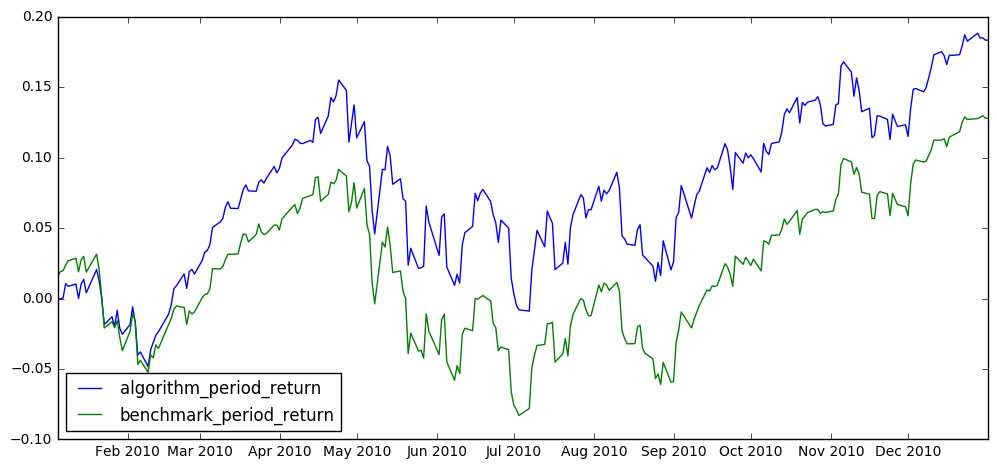

In [3]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

fig = plt.figure()
return_graph1 = fig.add_subplot(211)
algo_performance = plt.plot(performance.algorithm_period_return)
bench_performance = plt.plot(performance.benchmark_period_return)
plt.legend(loc=0)
plt.show()

As we can see our algorithm does not outperform the benchmark. Thus, let us take a deeper look into our distribution of long and short values in the portfolio and our overall return.

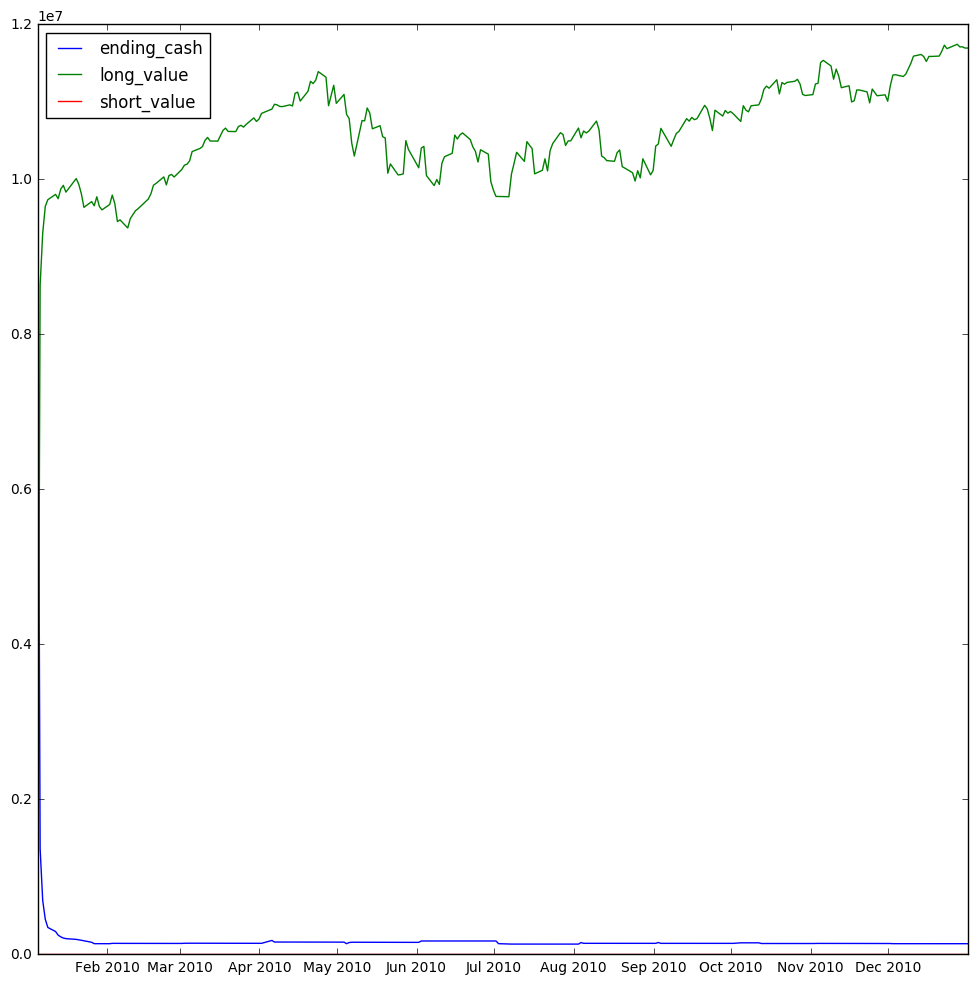

In [4]:
return_graph2 = fig.add_subplot(212)
algo_return = plt.plot(performance.ending_cash)
algo_long = plt.plot(performance.long_value)
# Take inverse of short value for comparison (by default short is always negative)
algo_short = plt.plot(-performance.short_value)
plt.legend(loc=0)
plt.show()

As we can see from the above figure, our algorithm performs quite well at the beginning. Around mid of October we see that the value which is bound in short investments starts to increase faster then our long investments. From the benchmark in the previous figure we have seen that the overall market increases. However, the algorithm holds primarily values that predict a decreasing market. As a first result, the RSI seems not to be a very well predictor of the actual value and the market behaviour. As we ran the simulation only for 2 months, this might only be true for that period of time. In a next step, we would need to analyse it over a longer period of time and go into depths of how RSI is calculated. Since we do not use RSI in our final algorithm, we will exclude this analysis here.

### Sharpe ratio
With the Sharpe ratio we can determine the return in respect to the risk involved. The Sharpe ratio is calculated by dividing the sum of the asset return and a benchmark return (S&P500 in our case) by the standard deviation of the asset return. The higher the Sharpe ratio, the higher the return with the same risk or the lower the risk with same return.

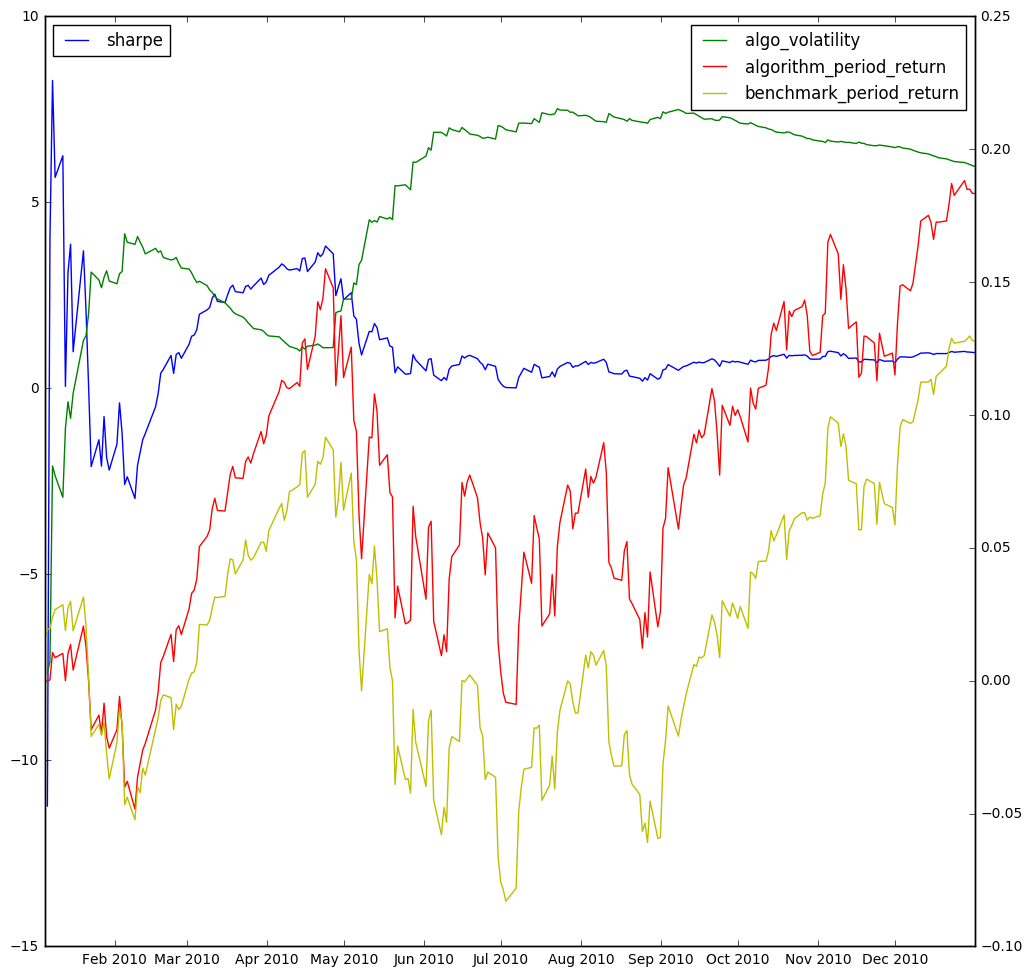

In [5]:
return_graph3, ax1 = plt.subplots()
ax1.plot(performance.sharpe, 'b')
plt.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(performance.algo_volatility, 'g')
ax2.plot(performance.algorithm_period_return, 'r')
ax2.plot(performance.benchmark_period_return, 'y')
plt.legend(loc=1)
plt.show()

From the above figure we see the Sharpe ratio as well as the three components the ratio is calculated from: algo_volatility (the standard deviation of asset return), algorithm_period_return and benchmark_period_return. Our algorithm performs quite poorly in terms of Sharpe ratio as overall performance is worse than the benchmark and the volatility of the return increases over time due to our losses.

### Alpha and Beta
The alpha value expresses the performance of the fund in comparison to a benchmark. Typically a higher alpha indicates a higher profitability in comparison to the benchmark. An alpha of zero means exact performance as the benchmark, a positive value indicates outperforming the benchmark and a negative value represents falling behind the benchmark.

The beta value shows the volatility of the fund in comparison to a benchmark. The beta value baseline is one and represents the same volatility as the benchmark. A value below one indicates a lower volatility and consequently a value above one a higher volatility than the benchmark.

<function matplotlib.pyplot.show>

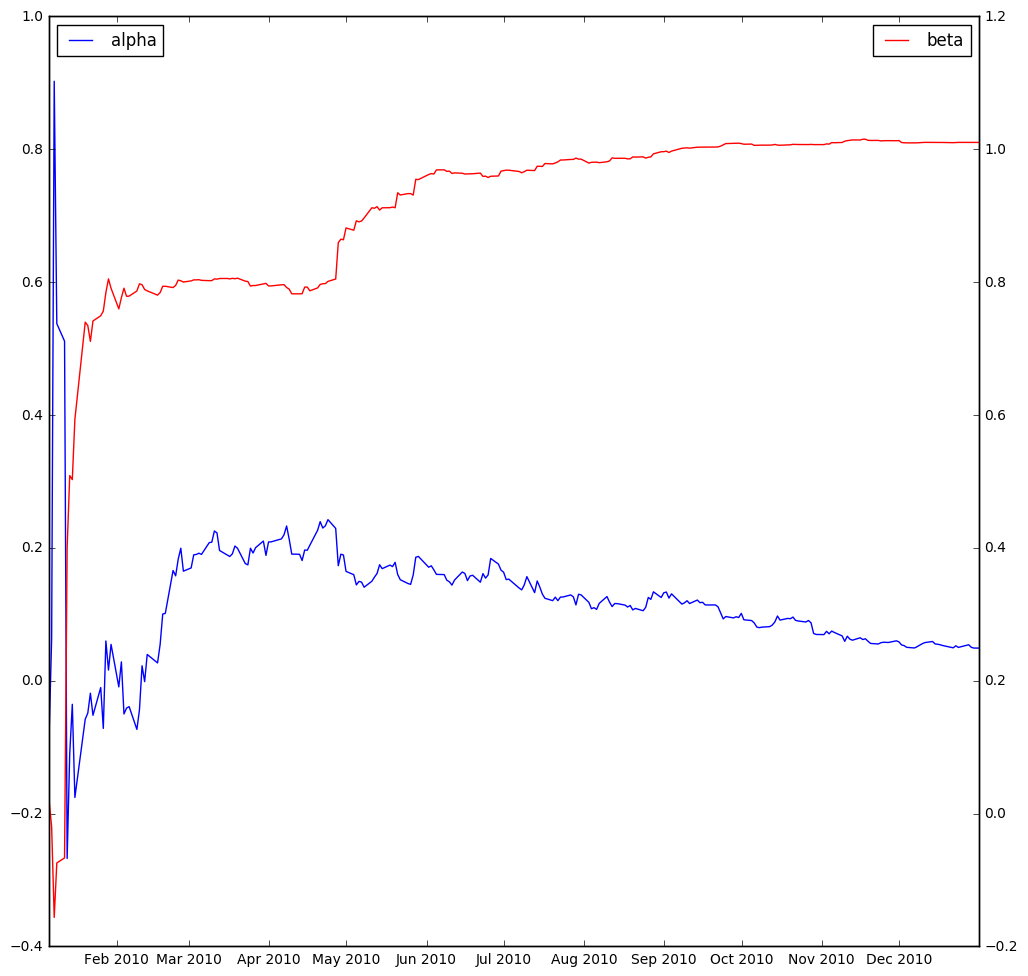

In [6]:
alpha_graph, ax1 = plt.subplots()
ax1.plot(performance.alpha, 'b')
plt.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(performance.beta, 'r')
plt.legend(loc=1)
plt.show

The figure above shows that the alpha value is decreasing overtime and confirms our observations earlier: our algorithm performs quite poorly in comparison to the S&P500.

Our beta value stays for the whole period below one, which means that our algorithm could be independent from the market. However, as it drops below zero the beta indicates that the algorithm reacts exactly opposite to the overall market.

## Time-based Performance
Lastly, we want to analyse our performance over time in terms of weekly and monthly results. Therefore our above mentioned indicators including return, Sharpe ratio, alpha and beta are put into a timely perspective.

In [7]:
monthly_returns = performance.returns.resample('M', how='mean')
weekly_returns = performance.returns.resample('W', how='mean')
# replace NaN values for plotting with default return (0)
daily_returns = performance.returns.fillna(value=0)
print('Monthly')
print(monthly_returns)
print('\nWeekly')
print(weekly_returns)
print('\nDaily')
print(daily_returns)

Monthly
2010-01-31   -0.001309
2010-02-28    0.002308
2010-03-31    0.003103
2010-04-30    0.001004
2010-05-31   -0.002540
2010-06-30   -0.002112
2010-07-31    0.002854
2010-08-31   -0.001531
2010-09-30    0.003484
2010-10-31    0.000907
2010-11-30   -0.000256
2010-12-31    0.002721
Freq: M, Name: returns, dtype: float64

Weekly
2010-01-10    0.001738
2010-01-17   -0.000891
2010-01-24   -0.005545
2010-01-31   -0.001386
2010-02-07   -0.002491
2010-02-14    0.002982
2010-02-21    0.008277
2010-02-28    0.001657
2010-03-07    0.006434
2010-03-14    0.002584
2010-03-21    0.002312
2010-03-28    0.001667
2010-04-04    0.003284
2010-04-11    0.001871
2010-04-18    0.001325
2010-04-25    0.006712
2010-05-02   -0.007043
2010-05-09   -0.012444
2010-05-16    0.006862
2010-05-23   -0.008376
2010-05-30    0.003798
2010-06-06   -0.007411
2010-06-13    0.004811
2010-06-20    0.005845
2010-06-27   -0.004025
2010-07-04   -0.012315
2010-07-11    0.013995
2010-07-18   -0.005199
2010-07-25    0.007622
20

In [8]:
monthly_sharpe = performance.sharpe.resample('M', how='mean')
weekly_sharpe = performance.sharpe.resample('W', how='mean')
# drop NaN values for plotting
daily_sharpe = performance.sharpe.dropna()
print('Monthly')
print(monthly_sharpe)
print('\nWeekly')
print(weekly_sharpe)
print('\nDaily')
print(daily_sharpe)

Monthly
2010-01-31    0.917604
2010-02-28   -0.689487
2010-03-31    2.358145
2010-04-30    3.242395
2010-05-31    1.185034
2010-06-30    0.574379
2010-07-31    0.440137
2010-08-31    0.459541
2010-09-30    0.658139
2010-10-31    0.814261
2010-11-30    0.817749
2010-12-31    0.925321
Freq: M, Name: sharpe, dtype: float64

Weekly
2010-01-10    1.691015
2010-01-17    2.857018
2010-01-24    0.935343
2010-01-31   -1.654731
2010-02-07   -1.608691
2010-02-14   -1.866166
2010-02-21    0.073742
2010-02-28    0.795813
2010-03-07    1.520482
2010-03-14    2.318817
2010-03-21    2.581410
2010-03-28    2.701699
2010-04-04    2.916695
2010-04-11    3.261501
2010-04-18    3.304014
2010-04-25    3.608768
2010-05-02    2.835479
2010-05-09    1.698846
2010-05-16    1.549038
2010-05-23    0.921939
2010-05-30    0.570312
2010-06-06    0.601976
2010-06-13    0.369897
2010-06-20    0.819325
2010-06-27    0.660961
2010-07-04    0.212269
2010-07-11    0.316657
2010-07-18    0.509074
2010-07-25    0.438414
201

In [9]:
monthly_alpha = performance.alpha.resample('M', how='mean')
weekly_alpha = performance.alpha.resample('W', how='mean')
# drop NaN values for plotting
daily_alpha = performance.alpha.dropna()
print('Monthly')
print(monthly_alpha)
print('\nWeekly')
print(weekly_alpha)
print('\nDaily')
print(daily_alpha)

Monthly
2010-01-31    0.067311
2010-02-28    0.051964
2010-03-31    0.196176
2010-04-30    0.207893
2010-05-31    0.160639
2010-06-30    0.160530
2010-07-31    0.133759
2010-08-31    0.116280
2010-09-30    0.111803
2010-10-31    0.086866
2010-11-30    0.063399
2010-12-31    0.052505
Freq: M, Name: alpha, dtype: float64

Weekly
2010-01-10    0.354512
2010-01-17   -0.015542
2010-01-24   -0.044346
2010-01-31    0.009730
2010-02-07   -0.022213
2010-02-14   -0.011217
2010-02-21    0.070815
2010-02-28    0.174243
2010-03-07    0.186307
2010-03-14    0.212097
2010-03-21    0.193866
2010-03-28    0.188559
2010-04-04    0.204235
2010-04-11    0.213962
2010-04-18    0.193700
2010-04-25    0.234307
2010-05-02    0.189376
2010-05-09    0.148541
2010-05-16    0.162065
2010-05-23    0.167223
2010-05-30    0.164727
2010-06-06    0.167727
2010-06-13    0.151118
2010-06-20    0.158474
2010-06-27    0.161478
2010-07-04    0.162124
2010-07-11    0.144352
2010-07-18    0.135705
2010-07-25    0.123770
2010

In [10]:
monthly_beta = performance.beta.resample('M', how='mean')
weekly_beta = performance.beta.resample('W', how='mean')
# drop NaN values for plotting
daily_beta = performance.beta.dropna()
print('Monthly')
print(monthly_beta)
print('\nWeekly')
print(weekly_beta)
print('\nDaily')
print(daily_beta)

Monthly
2010-01-31    0.473380
2010-02-28    0.788730
2010-03-31    0.801664
2010-04-30    0.806973
2010-05-31    0.915868
2010-06-30    0.963604
2010-07-31    0.976474
2010-08-31    0.986225
2010-09-30    1.003639
2010-10-31    1.006838
2010-11-30    1.012163
2010-12-31    1.010187
Freq: M, Name: beta, dtype: float64

Weekly
2010-01-10   -0.057484
2010-01-17    0.387619
2010-01-24    0.731685
2010-01-31    0.777188
2010-02-07    0.776998
2010-02-14    0.791241
2010-02-21    0.788087
2010-02-28    0.798466
2010-03-07    0.803035
2010-03-14    0.803902
2010-03-21    0.805475
2010-03-28    0.797288
2010-04-04    0.796026
2010-04-11    0.791230
2010-04-18    0.787421
2010-04-25    0.796902
2010-05-02    0.854865
2010-05-09    0.890016
2010-05-16    0.911482
2010-05-23    0.920598
2010-05-30    0.941378
2010-06-06    0.964311
2010-06-13    0.966237
2010-06-20    0.963217
2010-06-27    0.959986
2010-07-04    0.966395
2010-07-11    0.966535
2010-07-18    0.973914
2010-07-25    0.981277
2010-

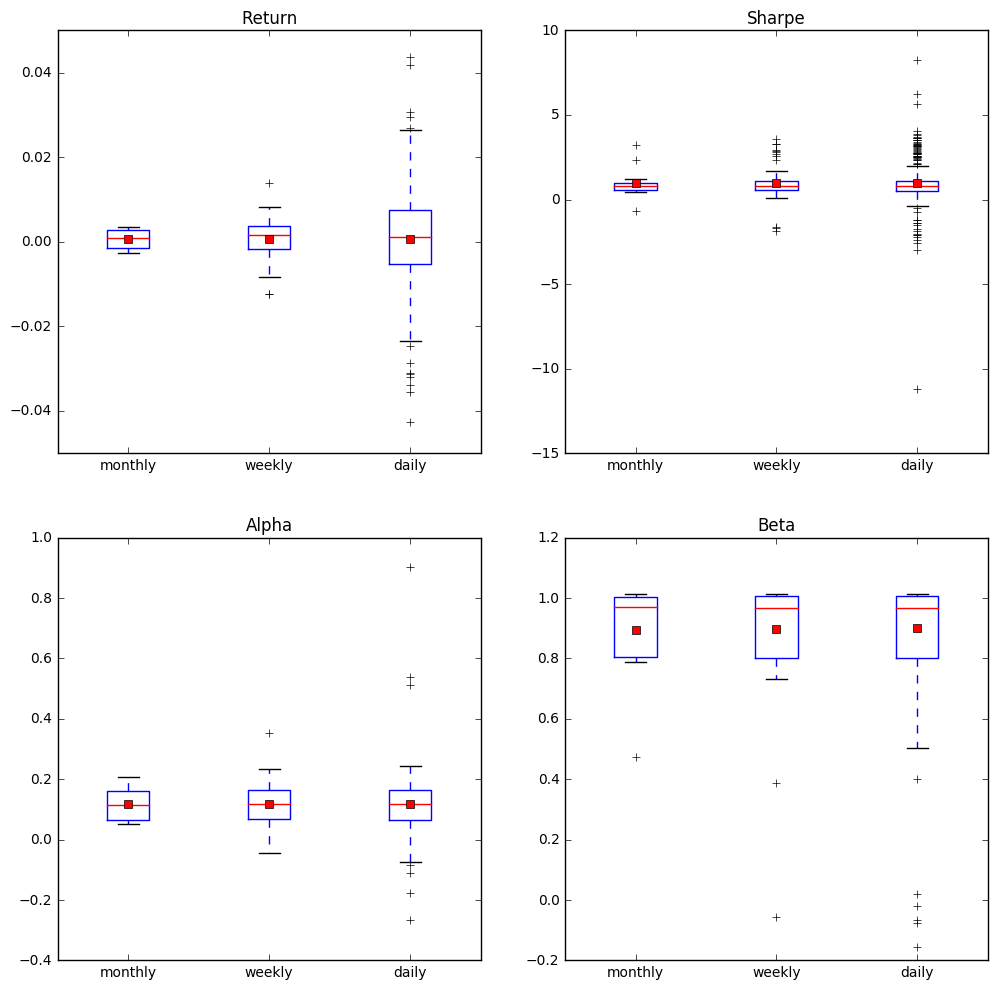

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
labels = ['monthly', 'weekly', 'daily']
axes[0, 0].boxplot((monthly_returns, weekly_returns, daily_returns), labels=labels, showmeans=True)
axes[0, 0].set_title('Return')
axes[0, 1].boxplot((monthly_sharpe, weekly_sharpe, daily_sharpe), labels=labels, showmeans=True)
axes[0, 1].set_title('Sharpe')
axes[1, 0].boxplot((monthly_alpha, weekly_alpha, daily_alpha), labels=labels, showmeans=True)
axes[1, 0].set_title('Alpha')
axes[1, 1].boxplot((monthly_beta, weekly_beta, daily_beta), labels=labels, showmeans=True)
axes[1, 1].set_title('Beta')
plt.setp(axes)
plt.show()

Generally the standard deviation of our measurements increases when we go from monthly, to weekly and then to a daily view. This is primarily caused by having more data points the finer the date granularity. However, with the Sharpe ratio it is quite interesting to see, that the weekly and daily standard devition stays quite similar.

In [12]:
from statistics import stdev
print('Standard deviation\nWeekly Sharpe: {}\nDaily: Sharpe {}'.format(stdev(weekly_sharpe), stdev(daily_sharpe)))

Standard deviation
Weekly Sharpe: 1.1232074973139767
Daily: Sharpe 1.553932290990472


The other measurements are less interseting and more data would be required to give a better view on their behaviour in relation to the time perspective. Especially, since the return of the algorithm more or less constantly falls behind the benchmark, the monthly indicators give a quite good representation of the overall trend. Simulating the algorithm for a year or more would however increase their meaning.